In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import  train_test_split
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('total_data_na.csv')

In [ ]:
df.head(2)

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,X50,X4s,X6s,Mat.y,Inns.y,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,0,6,8,0,0,0.0,0,0,0,0,0.0,0,0,0,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,6,39,30,0,0,0.0,0,0,0,0,0.0,0,0,0,0


In [ ]:
df.shape

(143, 25)

In [ ]:
df.isnull().sum().sum()

0

classify into batsman and bowlers

In [ ]:
x = df.iloc[:,[6,19]]

In [ ]:
x

,Avg.x,Avg.y
0,16.75,0
1,53.33,0
2,63,0
3,28.46,0
4,24.66,0
...,...,...
138,0,26.04
139,0,25.88
140,0,20.9
141,0,32.5


In [ ]:
avg_x = x['Avg.x']

In [ ]:
avg_x = list(avg_x)

In [ ]:
a = []
for i in avg_x:
  if i == '-':
    a.append(0)
  else:
    i = float(i)
    a.append(i)

In [ ]:
avg_y = x['Avg.y']

In [ ]:
b = []
for i in avg_y:
  if i == '-':
    b.append(0)
  else:
    i = float(i)
    b.append(i)

In [ ]:
x['Avg.x'] = a
x['Avg.y'] = b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
x.head(45)

,Avg.x,Avg.y
0,16.75,0.00
1,53.33,0.00
2,63.00,0.00
3,28.46,0.00
4,24.66,0.00
5,43.00,0.00
6,28.72,27.30
7,5.33,18.66
8,13.33,72.66
9,24.00,84.00


In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

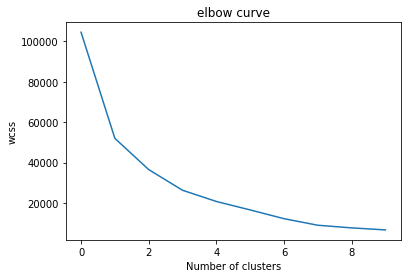

In [ ]:
plt.plot(np.arange(10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.title('elbow curve')
plt.show()

n_clusters = 7 

In [ ]:
model = KMeans(n_clusters = 3)
model.fit(x)
y_pred = model.predict(x)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0,
       0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 1,
       0, 0, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
m1 = x[y_pred == 0]
m2 = x[y_pred == 1]
m3 = x[y_pred == 2]

In [ ]:
m1

,Avg.x,Avg.y
6,28.72,27.30
7,5.33,18.66
17,8.50,23.75
21,16.42,19.00
22,13.00,25.25
24,16.66,27.80
31,14.08,26.40
39,3.00,21.66
44,0.00,0.00
46,14.00,28.36


In [ ]:
centroids = model.cluster_centers_

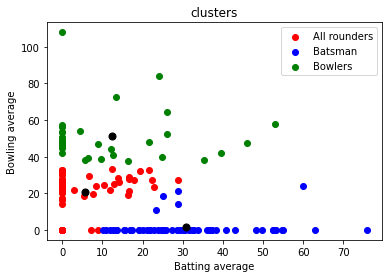

In [ ]:
plt.scatter(m1.iloc[:,0],m1.iloc[:,1], color = 'red')
plt.scatter(m2.iloc[:,0],m2.iloc[:,1], color = 'blue')
plt.scatter(m3.iloc[:,0],m3.iloc[:,1],color='green')
plt.scatter(centroids[:,0],centroids[:,1],s=50,c ='black')
plt.title('clusters')
plt.xlabel('Batting average')
plt.ylabel('Bowling average')
plt.legend(('All rounders','Batsman','Bowlers'))
plt.show()

In [ ]:
m  = KMeans(n_clusters = 7,random_state=0)

In [ ]:
m.fit(x)

KMeans(n_clusters=7, random_state=0)

In [ ]:
y_pr = m.predict(x)

In [ ]:
n1 = x[y_pr == 0]
n2 = x[y_pr == 1]
n3 = x[y_pr == 2]
n4 = x[y_pr == 3]
n5 = x[y_pr == 4]
n6 = x[y_pr == 5]
n7 = x[y_pr == 6]

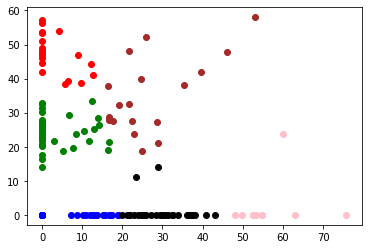

In [ ]:
plt.scatter(n1.iloc[:,0],n1.iloc[:,1],color ='red')
plt.scatter(n2.iloc[:,0],n2.iloc[:,1],color ='blue')
plt.scatter(n3.iloc[:,0],n3.iloc[:,1],color ='green')
plt.scatter(n4.iloc[:,0],n4.iloc[:,1],color ='black')
plt.scatter(n5.iloc[:,0],n5.iloc[:,1],color ='brown')
plt.scatter(n6.iloc[:,0],n6.iloc[:,1],color ='pink')
plt.show()